<IPython.core.display.Javascript object>


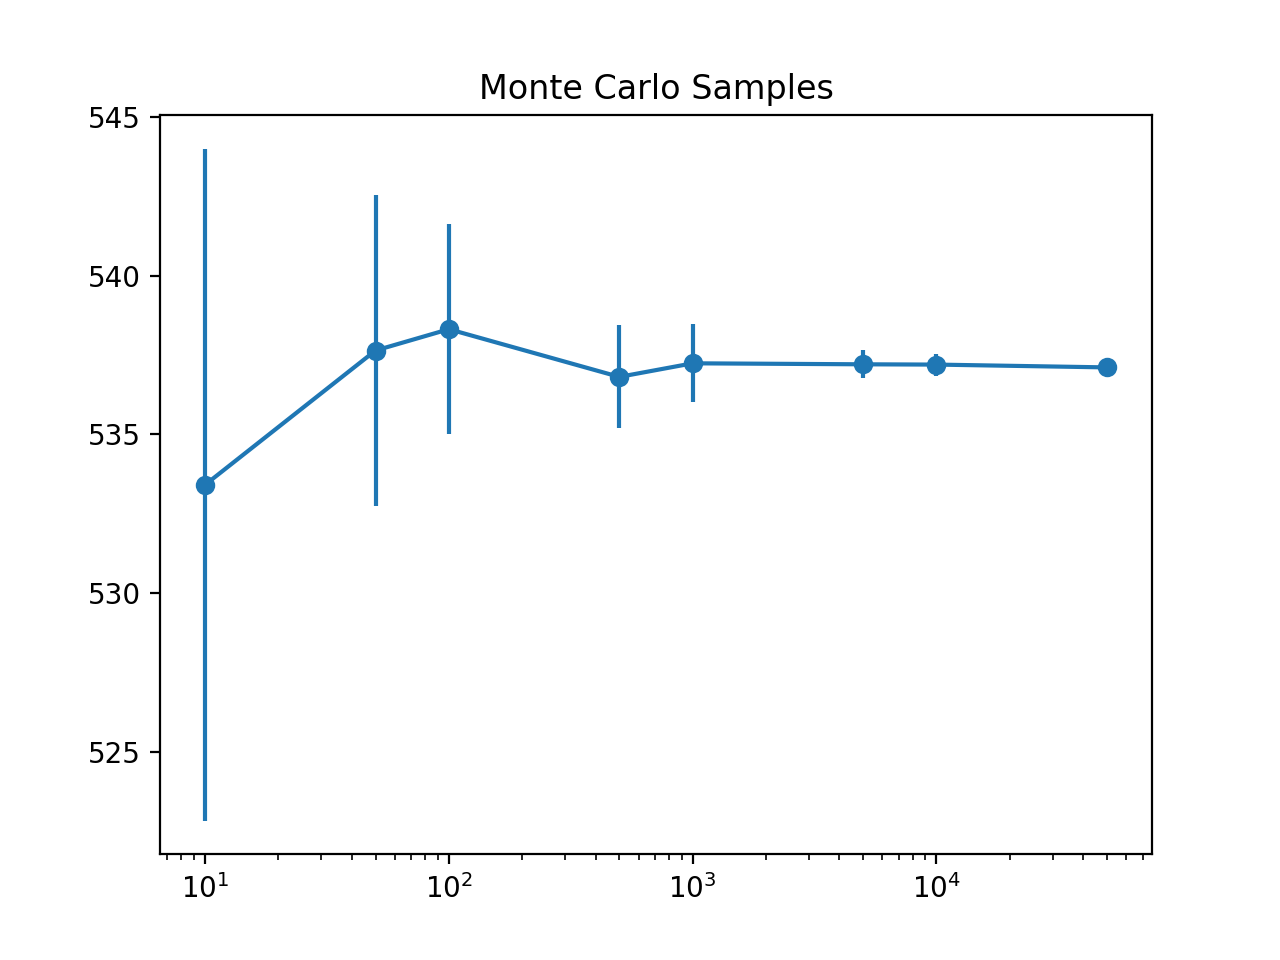

<IPython.core.display.Javascript object>


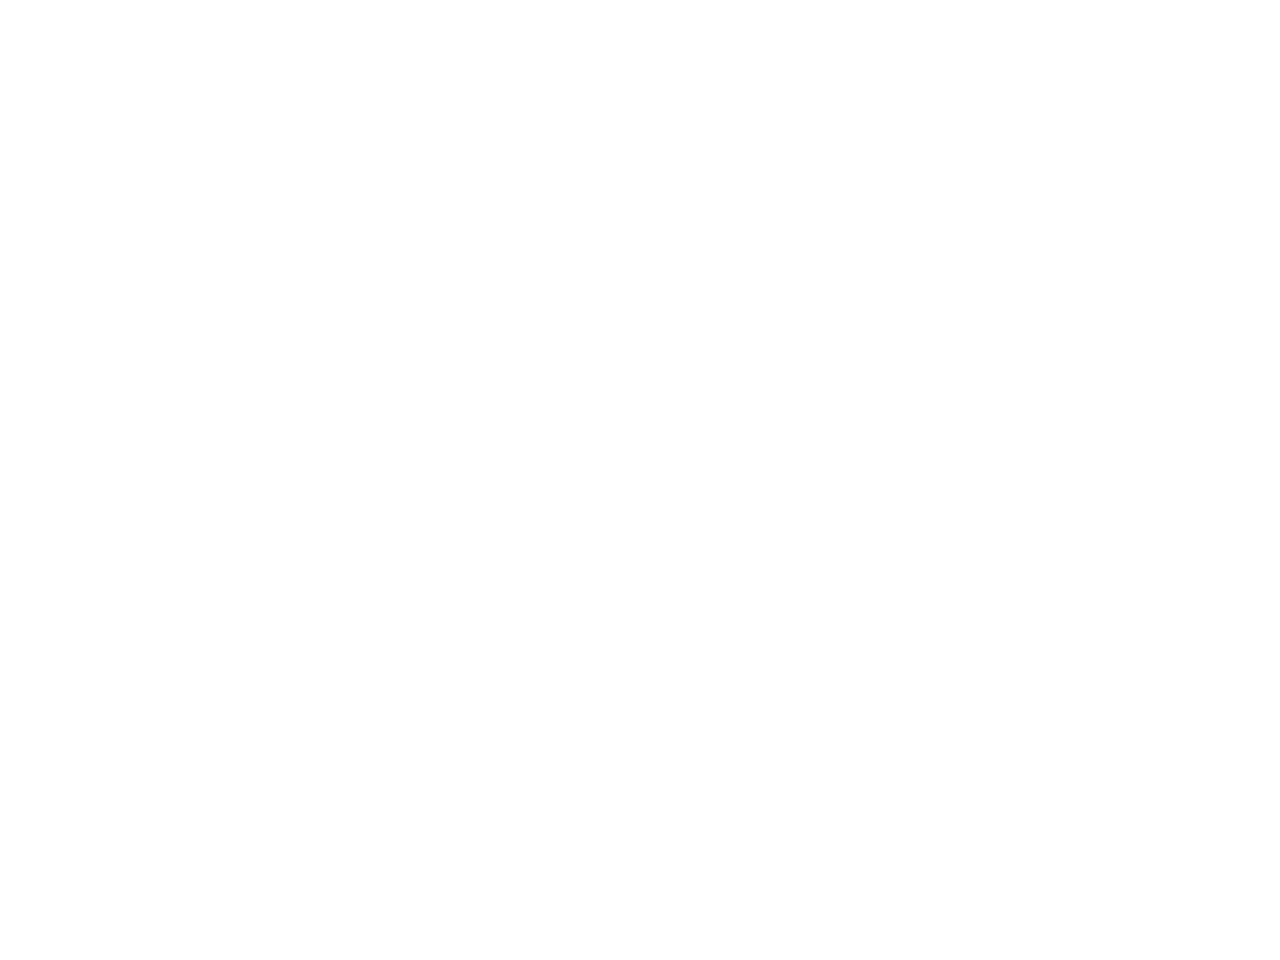

In [6]:
%matplotlib notebook

from numpy import pi, random, vectorize
from math import sin, sqrt
import numpy as np
import matplotlib.pyplot as plt


def generate_random_points(lo, hi, num_samples, si):
    return np.random.uniform(lo, hi, size = (num_samples, si))

def estimate_expectance(f, points):
    return f(points.sum(axis=1)).mean(axis=0);

def estimate_expectance_square(f, points):
    def g(x):
        return f(x)**2.0;
    gvec = vectorize(g)
    return estimate_expectance(g, points)

def standard_dev(f, points, V):
    N = len(points)
    return V*sqrt((estimate_expectance_square(f,points) - estimate_expectance(f,points)**2.0)/N)
    
def estimate_integral(f, num_samples):
    points = generate_random_points(0, pi/8, num_samples, 8)
    V = (pi/8.0)**8.0
    return (V*estimate_expectance(f, points), standard_dev(f, points, V))

vecsin = vectorize(sin)

def monte_carlo_mean_error(f, num_samples, nt):
    values = np.array([])
    for i in range(nt):
        values = np.append(values, estimate_integral(f, num_samples)[0])
    mean = values.mean(axis = 0)
    ms = 0
    
    for v in values:
        ms += ((v-mean)**2.0)
    rms = sqrt(ms/nt)
    
    return (mean, rms)

        
N_to_plot = [10, 50, 100, 500, 1000, 5000, 10000, 50000]


# example data
x = []
y = []
yerror = []

for n in N_to_plot:
    (mean, error) = monte_carlo_mean_error(lambda y: 10**6*vecsin(y), n, 25)
    x.append(n)
    y.append(mean)
    yerror.append(error)



fig, (ax0) = plt.subplots(nrows=1, sharex=True)
ax0.errorbar(x, y, yerr=yerror, fmt='-o')
ax0.set_title('Monte Carlo Samples')
ax0.set_xscale('log')

plt.figure()
plt.show()
